<h1 align='center' style='color:purple'> Deep Learning- 課程 30－Deep Learning- An introduction to UNet Image Segmentation 圖像 目標檢測- Python Tutorial</h1>

- 準備及下載 Datasets - Data Science Bowl 2018 
    - https://www.kaggle.com/c/data-science-bowl-2018
        - stage1_train 80,980 KB     

- UNet - Paper 論文參考
    - https://arxiv.org/abs/1505.04597   
    - https://arxiv.org/pdf/1505.04597.pdf

In [ ]:
- UNET
    - Olaf Ronneberger et a 等人開發
        - 生物醫學圖像分割 - Medical Image Segmentation
- UNET Architecture
        - 結構包含兩條路徑 - Two Paths
    
        - 第一條路徑
            - 收縮路徑 - 也稱為 編碼器 Encoder
                - 用於捕獲圖像中的上下文
                - 編碼器只是卷積和最大池化層的傳統堆棧
        - 第二條路徑 
            - 擴展路徑 - 也稱為解碼器
                - 用於使用轉置卷積實現精確定位
            - 因此，它是一個端到端 End-To-End
                    - 的全卷積網絡 - Fully Convolutional Network - FCN
                - 僅包含卷積層 Convolutional Layers
                    - 並且不包含任何密集層 Dense Layer
                - 因此它可以接受任何大小的圖像
                

<img src="https://img2018.cnblogs.com/blog/1503464/201907/1503464-20190702214924773-1537768185.png" width="75%">

- UNet Paper 論文 
    - Original Paper 原始 論文
        - 輸入圖像 Input Image 的尺寸 - 572x572x3
        - Input Image of size - 128x128x3


<img src="https://miro.medium.com/max/1562/1*yzbjioOqZDYbO6yHMVpXVQ.jpeg" width="75%">

In [ ]:
- UNet
    - CNN - 學習圖像的特徵映射 Feature Mapping
        - 並利用它 進行更細微的特徵映射
        - 在分類問題中 Classification Problem 效果很好
            - 因為圖像被轉換 - 為可進一步用於分類的向量 Vector
    - 在圖像分割中 Image Segmentation
        - 不僅需要將特徵圖轉換為向量 Image To Vector 
        - 還需要從該向量重構圖像 Reconstruct it Vector to Image 
        - 這是一項艱鉅的任務
            - 因為將向量轉換 Vector to Image 為圖像
                - 要比Image To Vector 困難得多
        
    - 在圖像轉換為向量的同時 
        - 當已經學習了圖像的特徵映射 Feature Mapping
    
- UNet 的 秘訣
    - 運用 收縮 Contraction 相同特徵圖 Feature Maps
        - 將向量 Vector 擴展 - 為分割的圖像 Segment Image
    - 保留圖像的結構完整性 Structural Integrity 
        - 將大大減少失真 Distortion
    

In [ ]:
- UNet Architecture
    - 結構 看起來像一個 - 'U'
        - 包括三個部分：- 收縮  Contraction Section
                       - 瓶頸  Bottleneck  Section
                       - 擴展  Expansion   Section

<img src="https://img2018.cnblogs.com/blog/1503464/201907/1503464-20190702214924773-1537768185.png" width="75%">

- 程式碼 Keras code 定義上述模型 

In [ ]:
- 收縮  Contraction Section
    - Contraction blocks
    - 每個塊採用一個輸入
        - 應用兩個 3X3 卷積層
        - 然後是   2X2 最大池化
    - 每個塊後的內核或特徵圖數量加倍 - Number of Kernels - Block Doubles
        - 可以學習複雜的結構 Learn The Complex Structures

- 瓶頸  Bottleneck  Section 
        
    - 最底層在收縮層和膨脹層之間介導 Contraction Layer & Expansion Layer
        - 使用 
            - 兩個 3X3 CNN層
            - 然後 2X2 向上卷積層 Convolution Layer

In [ ]:
- 擴展部分 architecture Expansion   Section Architecture
    - 由幾個擴展塊組成 Expansion Block
    
    - 每個模塊將輸入
        - 傳遞到 兩個 3X3 CNN層
        - 然後是      2X2上採樣層 Upsampling Layer
    - 同樣，在每個塊之後
        - 卷積層使用的特徵圖的數量將減半以保持對稱性 Symmetry
    - 但是，每當輸入也被相應收縮層的特徵圖附加時
        - 將確保在收縮圖像時學習的功能將用於重建圖像 Reconstruct
        - 擴展塊的數量與收縮塊的數量相同
            - 之後，結果映射將通過另一個 3X3 CNN 圖層
                - 其特徵映射的數量等於所需分段的數量
                - Feature Maps Equal To The Number Of Segments Desired
    

<img src="https://pics.spark-in.me/upload/cb8197bb7e57317eda88f921dfc1c413.png" width="50%">

<img src="https://user-images.githubusercontent.com/22321977/48601805-073ec100-e9ac-11e8-91d9-2ca4ea8c5d1e.png" width="75%">

<img src="https://miro.medium.com/max/4499/1*eKrh8FqJL3jodebYlielNg.png" width="100%">

- Resnet34 Network structure diagram 網絡 結構圖

<img src="https://img-blog.csdnimg.cn/20190921161814574.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L20wXzM3NDc3MTc1,size_16,color_FFFFFF,t_70" width="100%">

- 卷積塊 Block 

<img src="https://img-blog.csdnimg.cn/20181202195444128.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L20wXzM3NDc3MTc1,size_16,color_FFFFFF,t_70#pic_center" width="50%">

- Unet structure diagram 網絡 結構圖

<img src="https://miro.medium.com/max/4499/1*eKrh8FqJL3jodebYlielNg.png" width="100%">

- UNet - Loss Calculation 損失計算
    - 能量函數
        - 由最終特徵圖上的像素級 Softmax 結合交叉熵 Cross-Entropy/Loss Function 損失函數
            - 來計算
    - The energy function is computed 
        - by a pixel-wise soft-max 
        - over the final feature map 
        - combined with the cross-entropy loss function
         
- 每個像素使用了一種 損耗加權 Loss Weighting Scheme
    - Loss weighting scheme
    - 分割對象的邊界處具有更高的加權
    - 這種損失加權方案 
        - 幫助 U-Net模型 以不連續的方式分割生物醫學圖像中的細胞
        - 可以輕鬆地在二元分割圖中識別單個細胞
         
    - 像素級 Pixel-Wise Softmax 應用於生成的圖像
        - 然後是交叉熵損失函數 Cross-Entropy Loss Function
    - 因此， 將每個像素歸為一類 One Of The Classes
        - 這個想法是，即使在分割中，每個像素也必須屬於某個類別
        - 只需要確保它們確實在分類
    - 因此，只是將分割問題 Segmentation Problem
        - 轉換為一個多類分類問題 Multiclass Classification
        - 與傳統的損失函數 Traditional Loss Functions相比，表現非常好
        

- 應用 Appliaction

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-019-41034-2/MediaObjects/41598_2019_41034_Fig1_HTML.png?as=webp" width="˙25%">

<img src="https://i.imgur.com/ZXj1nzK.png" width="75%">

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-019-53797-9/MediaObjects/41598_2019_53797_Fig1_HTML.png?as=webp" width="75%">

<img src="https://img-blog.csdn.net/20180519115329536?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0Zvcm1sc2w=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70" width="100%">

<img src="https://www.researchgate.net/profile/Alan_Jackson9/publication/323597886/figure/fig2/AS:601386504957959@1520393124691/Convolutional-neural-network-CNN-architecture-based-on-UNET-Ronneberger-et-al.png" width="75%">

<img src="https://miro.medium.com/max/1536/0*XopkzM3HLI4UEKSZ.png" width="75%">

<img src="https://envirocons5home.files.wordpress.com/2019/06/figure1-1.jpg?w=476&h=310" width="75%">

<img src="https://pic4.zhimg.com/v2-8df8cad1df47e4a4be76537815663352_1200x500.jpg" width="50%">

- U-Net: Image Segmentation

<img src="https://neurohive.io/wp-content/uploads/2018/11/u-net-segmentation-e1542978983391.png" width="50%">

<img src="https://neurohive.io/wp-content/uploads/2018/11/u-net-x.png" width="75%">

<img src="https://neurohive.io/wp-content/uploads/2018/11/expert-vs-unet.jpeg" width="50%">

# 程式範例

In [ ]:
檔案路徑/


    ├── 課程 30－Deep Learning- An introduction to U-Net Image Segmentation 圖像 目標檢測.ipynb 
    ├── dataset
    |      ├── xxx1.Folder
    |      |     ├── images
    |      |     |      └── xxx1.png
    |      |     └── masks
    |      |            ├── xxx1.111.png
    |      |            └── xxx1.222.png
    |      ├── xxx2.Folder
    |      |     ├── images
    |      |     |      └── xxx2.png
    |      |     └── masks
    |      |            ├── xxx2.111.png
    |                   └── xxx2.222.png 
    |
    ├── stage1_train.zip 
    ├── unetmodel.png
    └── unetweights.h5

- 準備及下載 Datasets - Data Science Bowl 2018 
    - https://www.kaggle.com/c/data-science-bowl-2018
        - stage1_train 80,980 KB   

- 忽略 警告訊息 Warning  Message 

In [6]:
import warnings
warnings.filterwarnings("ignore")

- 檢查是否 - 有 GPU

In [14]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5542967089327333457
]


- os.environ 在 Jupyter Notebok 中 - 設置環境變量
- 初始化TensorFlow 
    - 將 TensorFlow 限制為第一個GPU之前

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
!python -V

Python 2.7.16


In [13]:
import keras 
print(keras.__version__)

2.4.3


- 安裝 / 導入
    - Install/ Import 所需的庫 - required libraries

- python - os.path 用法
    - https://docs.python.org/3/library/os.path.html

In [8]:
import os

print(os.path.abspath("."))    #目前目錄的絕對路徑
print(os.path.abspath(r".."))  #上一層目錄的絕對路路徑

/Users/wangweizhong/Desktop/CV/Image_Segmentation
/Users/wangweizhong/Desktop/CV


In [15]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2020
random.seed = seed
np.random.seed = seed
tf.seed = seed

- Data Generator

In [16]:
class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()
        
    def __load__(self, id_name):
        ## 檔案路徑 Path
        image_path = os.path.join(self.path, id_name, "images", id_name) + ".png"
        mask_path = os.path.join(self.path, id_name, "masks/")
        all_masks = os.listdir(mask_path)
        
        ## 讀取檔案 - Reading Image
        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))
        
        mask = np.zeros((self.image_size, self.image_size, 1))
        
        ## 讀取檔案 - Reading Masks
        for name in all_masks:
            _mask_path = mask_path + name
            _mask_image = cv2.imread(_mask_path, -1)
            _mask_image = cv2.resize(_mask_image, (self.image_size, self.image_size)) #128x128
            _mask_image = np.expand_dims(_mask_image, axis=-1)
            mask = np.maximum(mask, _mask_image)
            
        ## 歸一化 Normalizaing 
        image = image/255.0
        mask = mask/255.0
        
        return image, mask
    
    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size
        
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask  = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
            
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask
    
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))

- Hyperparameters

In [23]:
image_size = 128
train_path = "./dataset/stage1_train"

# 5 Epochs acc: 0.9417 / Epoch = 10  acc: 0.9493
epochs = 10   
batch_size = 8

# Training Ids
# next + os.walk() 資料夾中- 所有目錄 及 檔名
train_ids = next(os.walk(train_path))[1]

# Validation Data Size
val_data_size = 10

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

- Get one batch image file from DataFolder  - dataset/

In [25]:
gen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(8, 128, 128, 3) (8, 128, 128, 1)


- Check Image and 隨機拿取一張影像

- plt.subplots_adjust 調整 圖片的 空間配置
- fig.subplots_adjust(hspace=0.4, wspace=0.4)

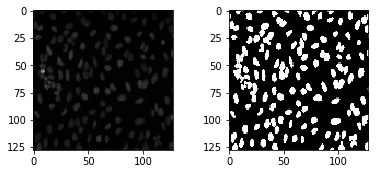

In [29]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

- Different Convolutional Blocks
    - 建立Unet 網絡 Build up Unet network Function - down_block/bottleneck/up_block

In [30]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

- 建立 UNet 網絡 模型架構 Build UNet Network Model Actitecture 

In [31]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    # downsampling 
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) # 128 -> 64
    c2, p2 = down_block(p1, f[1]) # 64 -> 32
    c3, p3 = down_block(p2, f[2]) # 32 -> 16
    c4, p4 = down_block(p3, f[3]) # 16->8
    
    bn = bottleneck(p4, f[4])
    
    # upsampling 
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [32]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

- 模型可视化 Model Visualization 
    - Save to Unetmodel_plot.png
    
    - pip install pydot/pydot-ng
    - pip install graphviz
    
    -  show_shapes = True 

In [33]:
!pip install pydot/pydot-ng
!pip install graphviz

ERROR: Invalid requirement: 'pydot/pydot-ng'
Hint: It looks like a path. File 'pydot/pydot-ng' does not exist.


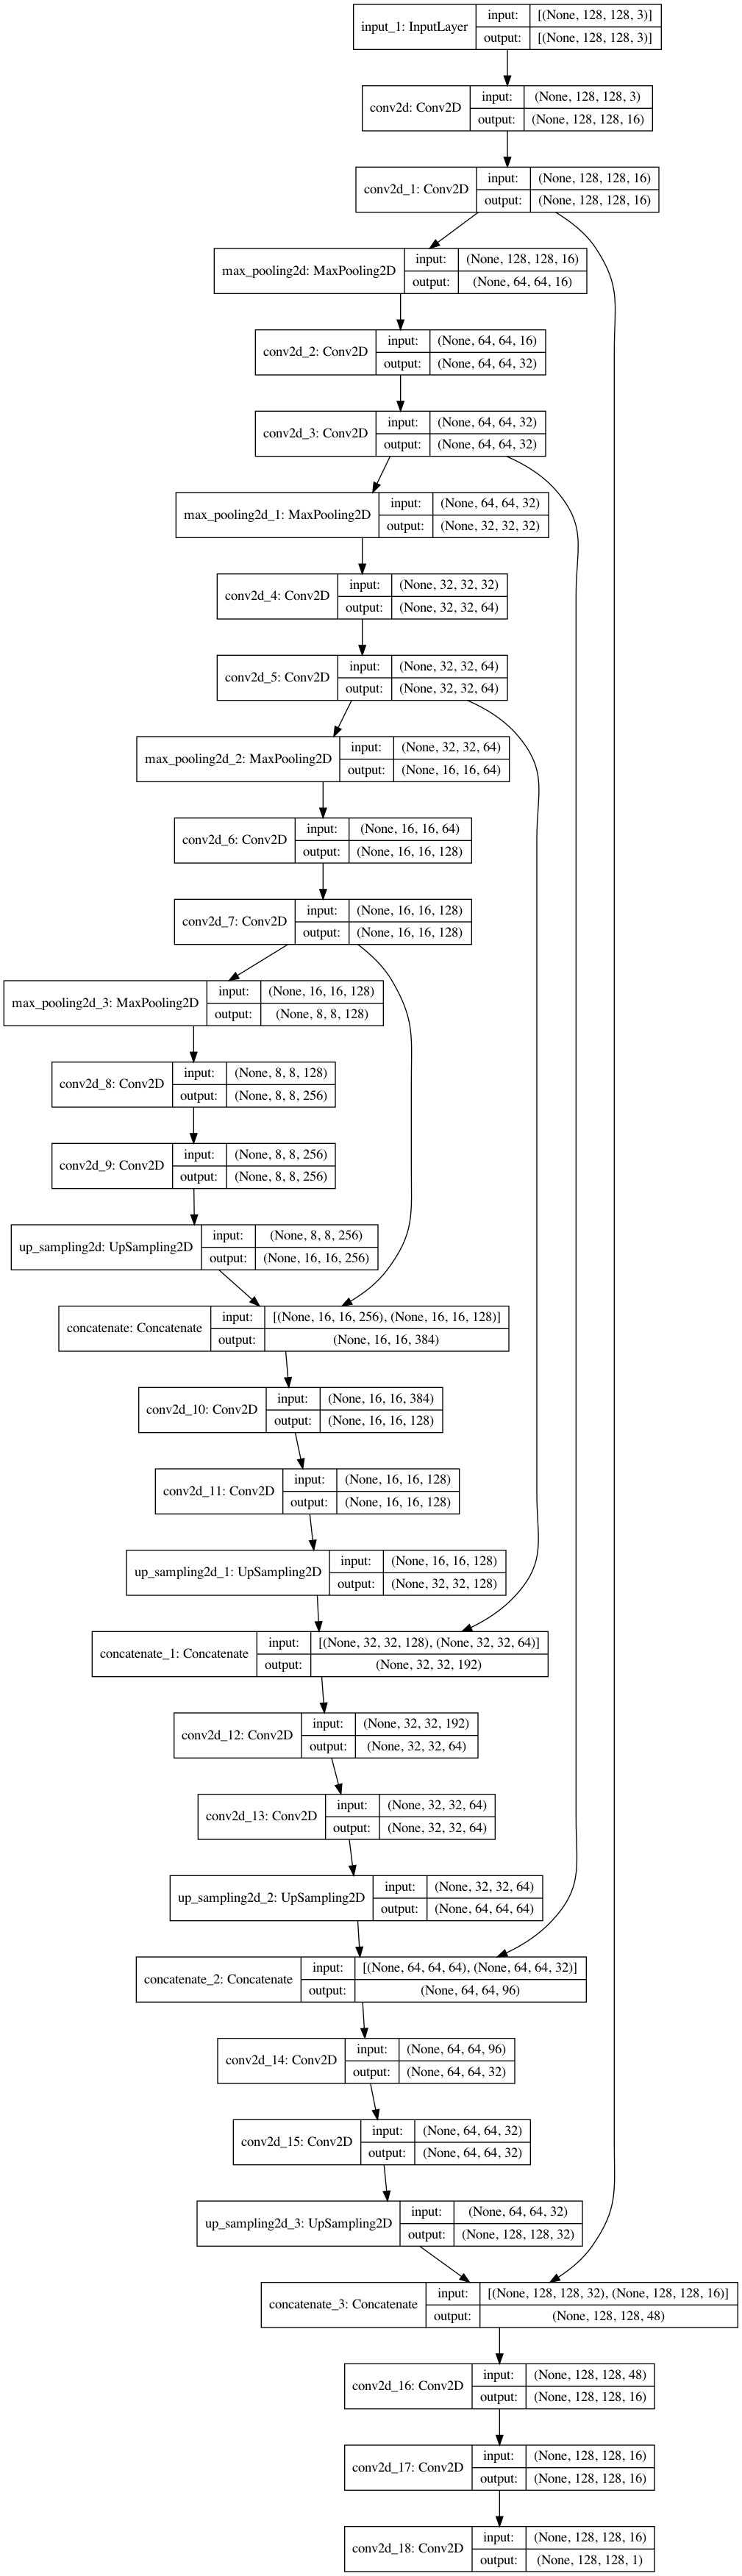

In [34]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Unetmodel_plot.png', show_shapes=True, show_layer_names=True)

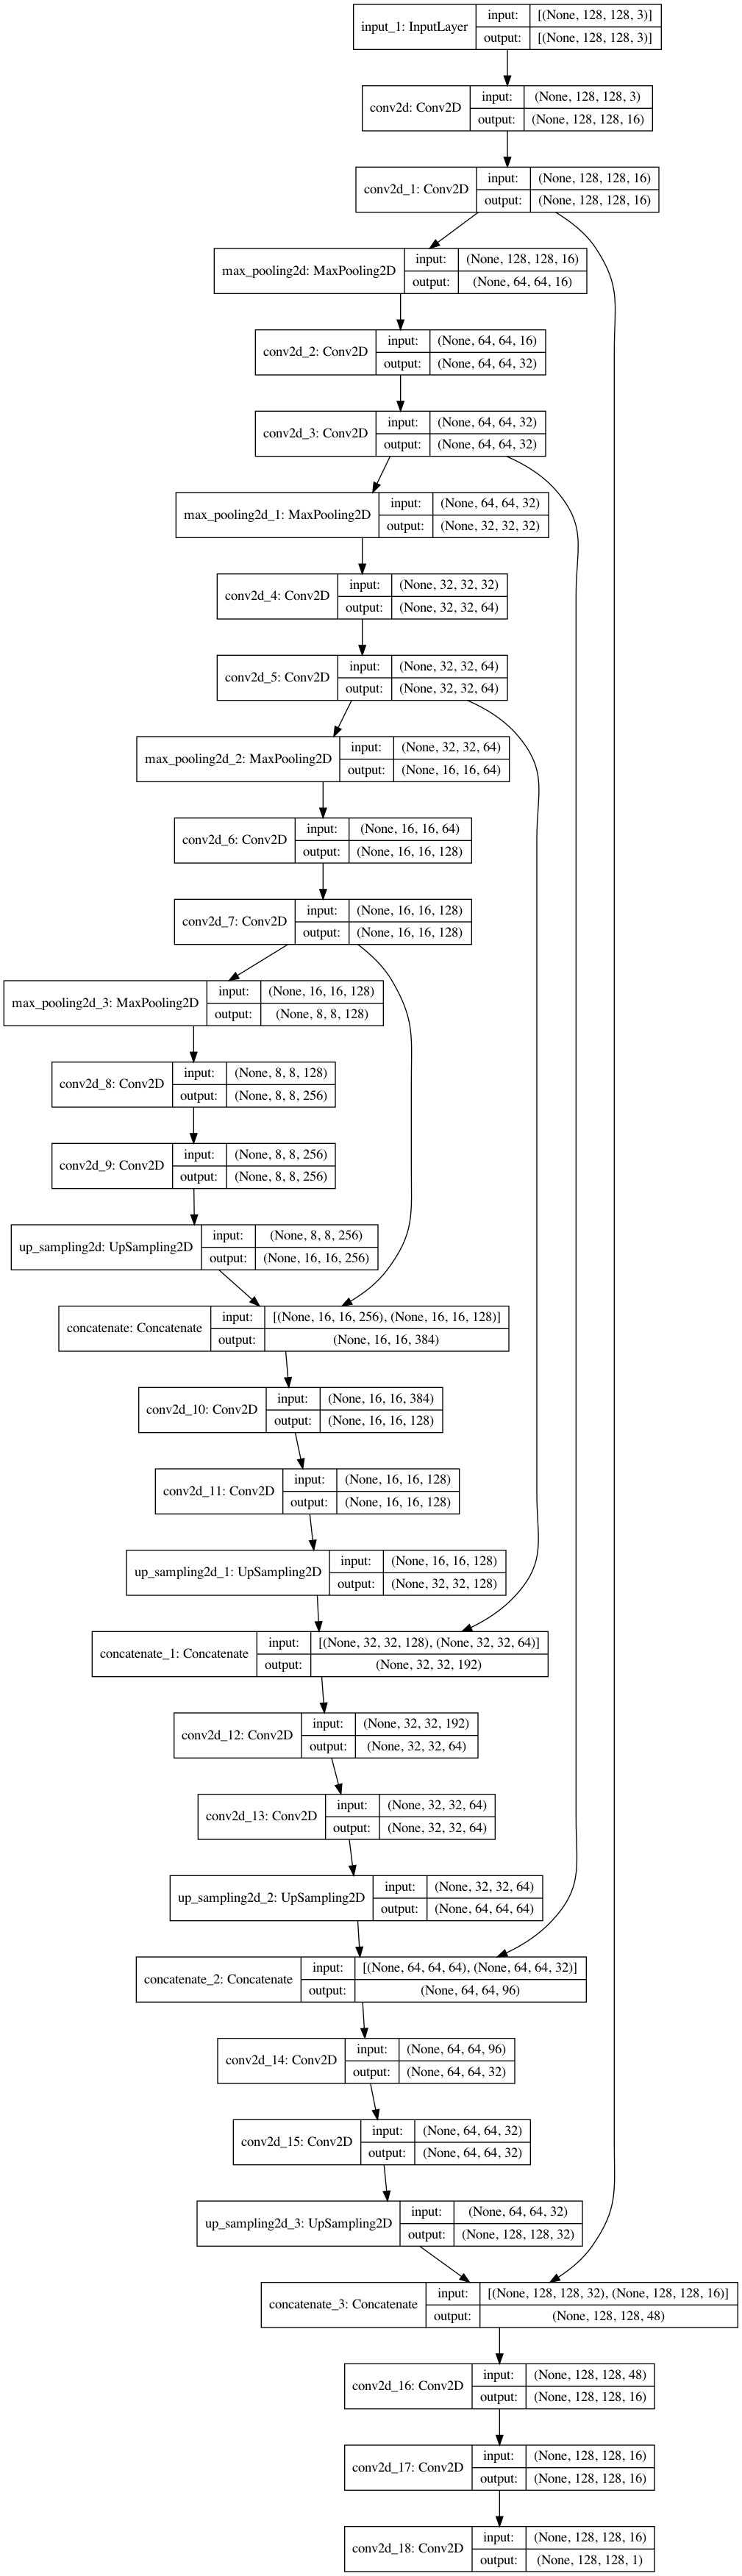

In [35]:
import IPython
IPython.display.Image("Unetmodel_plot.png")

- 訓練模型 Training the model

In [36]:
%%time

train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, 
                    epochs=epochs)

Epoch 1/10
82/82 [==============================] - 50s 583ms/step - loss: 0.4452 - acc: 0.8498 - val_loss: 0.3551 - val_acc: 0.8192
Epoch 2/10
82/82 [==============================] - 43s 521ms/step - loss: 0.2577 - acc: 0.8632 - val_loss: 0.1469 - val_acc: 0.9387
Epoch 3/10
82/82 [==============================] - 47s 570ms/step - loss: 0.1831 - acc: 0.9077 - val_loss: 0.2658 - val_acc: 0.8373
Epoch 4/10
82/82 [==============================] - 55s 670ms/step - loss: 0.1316 - acc: 0.9333 - val_loss: 0.2395 - val_acc: 0.8582
Epoch 5/10
82/82 [==============================] - 53s 646ms/step - loss: 0.1206 - acc: 0.9387 - val_loss: 0.2116 - val_acc: 0.8904
Epoch 6/10
82/82 [==============================] - 51s 618ms/step - loss: 0.1076 - acc: 0.9437 - val_loss: 0.1812 - val_acc: 0.9044
Epoch 7/10
82/82 [==============================] - 50s 607ms/step - loss: 0.1033 - acc: 0.9443 - val_loss: 0.1497 - val_acc: 0.9279
Epoch 8/10
82/82 [==============================] - 51s 616ms/step - 

- 查驗 訓練數據
    - Listing all data in history

In [23]:
model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [24]:
model.history.history['acc']

[0.8497764905880298,
 0.8476741175826003,
 0.9165633000978609,
 0.933767326721331,
 0.9416756993386803,
 0.9463039454890461,
 0.9481420022685353,
 0.9496628147799794,
 0.950730339056108,
 0.9503486439949129]

- pip install h5py


- 保存模型 save Model - HDF5 file
    - model.save('my_model.h5') 
    - model = load_model('my_model.h5')

- 只保存權重
    - model.save_weights('my_model_weights.h5')
    - model.load_weights('my_model_weights.h5')

- 可視化

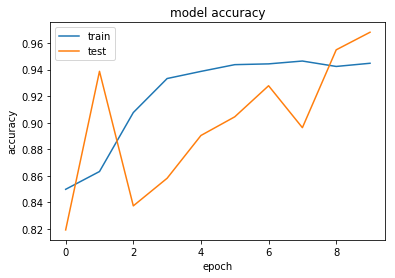

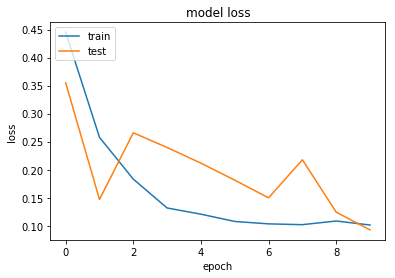

In [39]:
# summarize history for accuracy

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- 測試模型 Testing the model

In [47]:
# 保存權重 - Save the Weights
model.save_weights("Unetweights.h5")

# 預測 Dataset 
x, y = valid_gen.__getitem__(1)
result = model.predict(x)
print(len(result))
result = result > 0.5
print(len(result))
print(result.shape)

2
2
(2, 128, 128, 1)


- 可视化 預測結果  Result Visualization - Gray color 

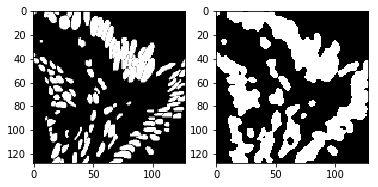

In [49]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

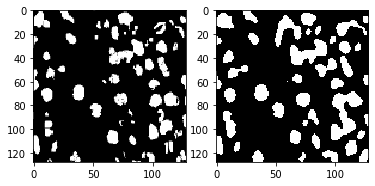

In [29]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[1]*255, (image_size, image_size)), cmap="gray")

- 可视化 預測結果  Result Visualization - color 

In [30]:
# 保存權重 - Save the Weights
# model.save_weights("Unetweights.h5")

# 預測 Dataset
x, y = valid_gen.__getitem__(3)
result = model.predict(x)

print(len(result))

result = result > 0.5
print(len(result))
print(result.shape)

2
2
(2, 128, 128, 1)


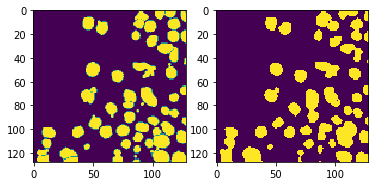

In [31]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size))) 

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)))

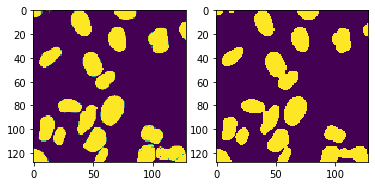

In [32]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size))) 

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[1]*255, (image_size, image_size)))

In [50]:
np.maximum([1,8,2],[3,5,5])

array([3, 8, 5])